# Set-up

In [1]:
%cd ..

/app


In [4]:
from pickle import NONE
import librosa
import pandas as pd
import numpy as np
import numpy.typing as npt
from typing import Tuple, Union
from pydub import AudioSegment
import os
import time
import sklearn
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

from tonami import pitch_process as pp
from tonami import audio_utils
from tonami.Classifier import PITCH_FILEPATH
from tonami import Classifier as c
from tonami import build_classifiers as bc
from tonami import user
from tonami import Utterance as u
from tonami import build_classifiers as bc
import matplotlib.pyplot as plt

# All generated data

In [61]:
# consolidate data
user_audio_df = pd.DataFrame(user_audio_dict)
raw_data_df = pd.DataFrame(raw_data_dict)
times_df = pd.DataFrame(times_dict)

## With Outliers

### User Audio

In [62]:
display(user_audio_df)

,Filename,Durations,Filtered Durations
0,2022-03-05_06:58:51.mp3,1.58,0.185760
1,2022-03-05_07:01:24.mp3,1.36,0.185760
2,2022-03-05_07:03:11.mp3,2.08,0.208980
3,ex10_wu3_2022-03-01_00:18:09.mp3,2.84,0.464399
4,ex10_wu3_2022-03-01_00:18:26.mp3,2.92,0.534059
...,...,...,...
540,ex9_gan4_2022-03-03_19:35:36.mp3,2.42,0.185760
541,ex9_gan4_2022-03-03_19:36:18.mp3,2.92,0.208980
542,ex9_gan4_2022-03-04_01:21:10.mp3,1.84,0.348299
543,ex9_gan4_2022-03-04_01:21:36.mp3,2.06,0.208980


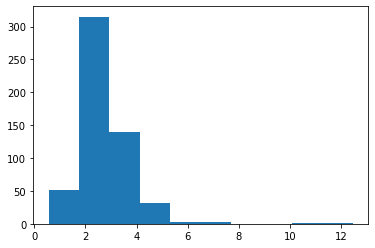

[ 51. 315. 139.  32.   3.   3.   0.   0.   1.   1.]
[ 0.56  1.75  2.94  4.13  5.32  6.51  7.7   8.89 10.08 11.27 12.46]


In [63]:
n, bins, _ = plt.hist(user_audio_df['Durations'])
plt.show() 
print(n)
print(bins)

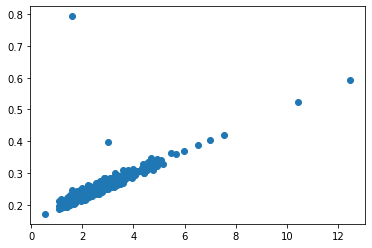

In [64]:
plt.scatter(user_audio_df['Durations'], times_df['load'])
plt.show()

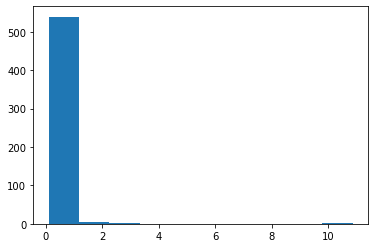

[539.   4.   1.   0.   0.   0.   0.   0.   0.   1.]
[ 0.09287982  1.17028571  2.24769161  3.32509751  4.4025034   5.4799093
  6.55731519  7.63472109  8.71212698  9.78953288 10.86693878]


In [65]:
n, bins, _ = plt.hist(user_audio_df['Filtered Durations'])
plt.show() 
print(n)
print(bins)

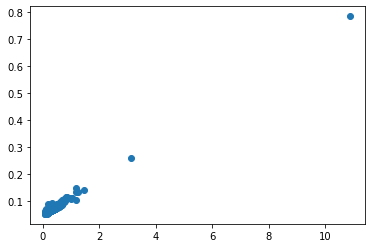

In [66]:
plt.scatter(user_audio_df['Filtered Durations'], times_df['contour'])
plt.show()

### Raw Data

In [67]:
display(raw_data_df)

,Time Series,Filtered Time Series,Pitch Contours,Normalized Pitch,Nans,Features
0,"[1.3977235e-07, -1.6893404e-07, 1.9791972e-07,...","[-0.006015002, -0.0067452397, -0.0077910842, -...","[nan, nan, nan, 89.60596419119524, 89.60596419...","[[3.5009614209204045, 3.5009614209204045, 3.50...","[True, True, True, False, False, False, False,...","[[3.5009614209204045, 3.5098437537009346, 3.52..."
1,"[-9.661199e-08, 2.3216649e-07, -4.3016217e-07,...","[-0.007913667, -0.01239815, -0.011122777, -0.0...","[nan, nan, nan, nan, 177.1535038204721, 177.15...","[[1.7496094176392947, 1.7496094176392947, 1.74...","[True, True, True, True, False, False, False, ...","[[1.7496094176392945, 1.7386439167102328, 1.69..."
2,"[1.2223254e-07, -1.4356887e-07, 1.6408815e-07,...","[-0.02271522, -0.035587482, -0.02684846, -0.02...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[[nan, nan, nan, nan, nan, nan, nan, nan, nan,...","[True, True, True, True, True, True, True, Tru...","[[nan, nan, nan, nan, nan, nan]]"
3,"[3.5554133e-06, -1.6102125e-05, -3.8875164e-06...","[-0.01174777, -0.021985484, -0.029291227, -0.0...","[nan, 108.42268703014184, 109.68249796946259, ...","[[nan, nan, nan, nan, nan, nan, nan, nan, nan,...","[True, False, False, False, False, False, Fals...","[[nan, nan, nan, nan, nan, nan]]"
4,"[7.8282305e-08, -9.000064e-08, 1.00353624e-07,...","[6.7629444e-05, 0.002870746, 0.0056687947, 0.0...","[nan, 104.72941228206267, 104.12621525348065, ...","[[nan, nan, nan, nan, nan, nan, nan, nan, nan,...","[True, False, False, False, False, False, Fals...","[[nan, nan, nan, nan, nan, nan]]"
...,...,...,...,...,...,...
540,"[-2.625508e-06, -2.283729e-05, -6.255846e-06, ...","[0.18586472, 0.17913696, 0.16346836, 0.1316242...","[nan, 250.53288772482563, 253.44393965741244, ...","[[0.8531271662415318, 0.8411710708924227, 0.82...","[True, False, False, False, False, False, Fals...","[[0.8401863127848892, 0.8095315148209564, 0.83..."
541,"[9.3057e-06, 9.258277e-06, -5.0076005e-06, 5.5...","[-0.036951177, -0.036396816, -0.043634284, -0....","[nan, 301.3973362949152, 301.3973362949152, 30...","[[0.38414853372520935, 0.38414853372520935, 0....","[True, False, False, False, False, False, Fals...","[[0.38488891940112463, 0.4281334035315094, 0.6..."
542,"[9.6540155e-08, -1.14747415e-07, 1.3331108e-07...","[-0.026051711, -0.029187553, -0.036844507, -0....","[nan, 155.11447618337345, 158.74010519681997, ...","[[nan, nan, nan, nan, nan, nan, nan, nan, nan,...","[True, False, False, False, False, False, Fals...","[[nan, nan, nan, nan, nan, nan]]"
543,"[3.1495745e-08, -4.2454158e-08, 5.4979235e-08,...","[-0.0021418293, 0.019164437, 0.03373158, 0.037...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[[nan, nan, nan, nan, nan, nan, nan, nan, nan,...","[True, True, True, True, True, True, True, Tru...","[[nan, nan, nan, nan, nan, nan]]"


### Times

In [68]:
display(times_df)

,load,trim,contour,preprocess,total
0,0.793528,0.002044,0.087521,0.002220,0.656422
1,0.194055,0.001006,0.058846,0.000479,0.281823
2,0.230877,0.000876,0.058458,0.000238,0.316403
3,0.254836,0.000631,0.075367,0.000701,0.346250
4,0.254812,0.000621,0.078201,0.000267,0.359527
...,...,...,...,...,...
540,0.245411,0.000411,0.058727,0.000103,0.315604
541,0.259371,0.000418,0.058394,0.000103,0.336679
542,0.233043,0.000425,0.067304,0.000091,0.306950
543,0.235301,0.000428,0.058375,0.000090,0.307741


## Without Outliers

In [75]:
outliers = user_audio_df[user_audio_df['Filtered Durations'] > 0.8].index
print("Num of outliers: ", len(outliers))
user_audio_df_fix = user_audio_df.drop(outliers)
raw_data_df_fix = raw_data_df.drop(outliers)
times_df_fix = times_df.drop(outliers)

Num of outliers:  14


### User Audio

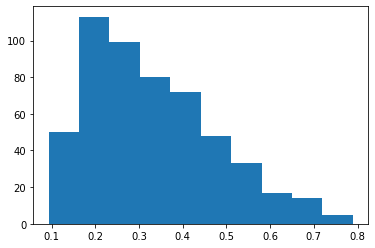

[ 50. 113.  99.  80.  72.  48.  33.  17.  14.   5.]
[0.09287982 0.16253968 0.23219955 0.30185941 0.37151927 0.44117914
 0.510839   0.58049887 0.65015873 0.71981859 0.78947846]


In [76]:
n, bins, _ = plt.hist(user_audio_df_fix['Filtered Durations'])
plt.show() 
print(n)
print(bins)

# Report

In [77]:
# File report
print("Audio File Statistics")
print("Quantity :", user_audio_df.shape[0])
print("Duration :", "%.2f" % round(user_audio_df['Durations'].mean(), 2), u"\u00B1", "%.2f" % round(user_audio_df['Durations'].std(), 2) )
print("Filtered :", "%.2f" % round(user_audio_df['Filtered Durations'].mean(), 2), u"\u00B1", "%.2f" % round(user_audio_df['Filtered Durations'].std(), 2) )
print("\n")

print("Audio File Statistics (w/o outliers)")
print("Quantity :", user_audio_df_fix.shape[0])
print("Duration :", "%.2f" % round(user_audio_df_fix['Durations'].mean(), 2), u"\u00B1", "%.2f" % round(user_audio_df_fix['Durations'].std(), 2) )
print("Filtered :", "%.2f" % round(user_audio_df_fix['Filtered Durations'].mean(), 2), u"\u00B1", "%.2f" % round(user_audio_df_fix['Filtered Durations'].std(), 2) )

Audio File Statistics
Quantity : 545
Duration : 2.75 ± 1.03
Filtered : 0.36 ± 0.50


Audio File Statistics (w/o outliers)
Quantity : 531
Duration : 2.72 ± 0.92
Filtered : 0.32 ± 0.15


In [78]:
# Time breakdown reports
print("Task Time Statistics (microseconds)")
for name, values in times_df.items():
    print("%10s :" % name, 
          "%6i" % (values.mean()*1000000), 
          u"\u00B1", 
          "%6i" % (values.std()*1000000)
         )    
print("\n")

print("Task Time Statistics (w/o outliers) (microseconds)")
for name, values in times_df_fix.items():
    print("%10s :" % name, 
          "%6i" % (values.mean()*1000000),
          u"\u00B1", 
          "%6i" % (values.std()*1000000)
         )

Task Time Statistics (microseconds)
      load : 254002 ±  44594
      trim :    555 ±    268
   contour :  69258 ±  34158
preprocess :    130 ±    109
     total : 350115 ±  70563


Task Time Statistics (w/o outliers) (microseconds)
      load : 253070 ±  41657
      trim :    546 ±    245
   contour :  66439 ±  10091
preprocess :    129 ±    109
     total : 346281 ±  46295
